# Plotting Sigmoid Function

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [259]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [260]:
sigmoid(1, 0.5, 0)

0.6224593312018546

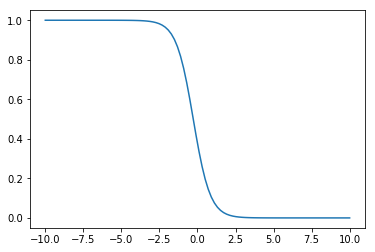

In [261]:
w = -1.8    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -0.5  #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [262]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [263]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [264]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [265]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [266]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

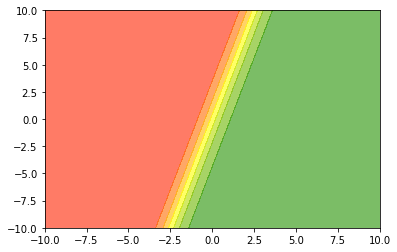

In [267]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

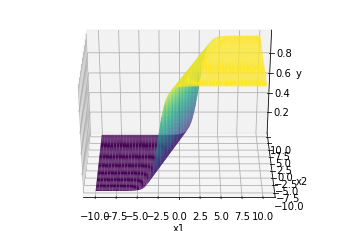

In [268]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Compute Loss for a Given Dataset

In [269]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

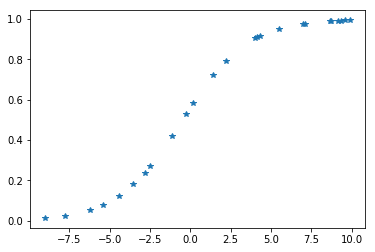

In [270]:
plt.plot(X, Y, '*')
plt.show()

In [271]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [272]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [273]:
WW.shape

(101, 101)

In [274]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

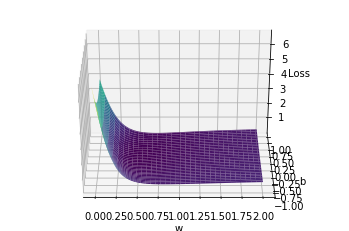

In [275]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [276]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [277]:
print(i, j)

62 25


In [278]:
print(WW[i, j], BB[i, j])

0.5 0.24


# Class for Sigmoid Neuron

In [279]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      # we wre writing the code now to draw the graph for the loss along with epoch values.
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)  # one kind of loss only like squared loss
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.title("Epoch vs Mean Squared Error.")
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Fit for toy data

In [280]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [281]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [282]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()


[[1.77252333 0.39792205]] [0.00510258]



[[1.81810724 0.11913767]] [0.05049031]



[[ 1.80107577 -0.11020619]] [0.03294104]



[[ 1.74044067 -0.4549975 ]] [-0.03039968]



[[ 1.72132544 -0.62313457]] [-0.08134211]



[[ 1.76323692 -0.58730004]] [-0.11878824]



[[ 1.78515065 -0.60283233]] [-0.15347463]



[[ 1.80851124 -0.60911407]] [-0.1855926]



[[ 1.83014986 -0.61608271]] [-0.21559675]



[[ 1.85061684 -0.62258744]] [-0.24370073]



[[ 1.87000591 -0.62875172]] [-0.27010491]



[[ 1.88842357 -0.63460638]] [-0.29498058]



[[ 1.9059614 -0.6401802]] [-0.31847603]



[[ 1.92269908 -0.64549837]] [-0.34072027]



[[ 1.93870632 -0.65058298]] [-0.36182604]



[[ 1.9540444  -0.65545348]] [-0.38189237]



[[ 1.96876741 -0.66012711]] [-0.40100655]



[[ 1.9829233  -0.66461914]] [-0.4192459]



[[ 1.99655476 -0.66894321]] [-0.43667917]



[[ 2.00969992 -0.67311153]] [-0.45336768]



[[ 2.02239299 -0.67713504]] [-0.46936635]



[[ 2.03466474 -0.68102361]] [-0.48472452]



[[ 2.04654294 -0.68478615]] [-0.49948666]



[[ 2.05805275 -0.68843072]] [-0.51369298]



[[ 2.069217   -0.69196468]] [-0.52737992]



[[ 2.08005649 -0.69539469]] [-0.5405806]



[[ 2.0905902  -0.69872688]] [-0.55332522]



[[ 2.10083552 -0.70196682]] [-0.56564136]



[[ 2.11080839 -0.70511964]] [-0.57755429]



[[ 2.12052346 -0.70819007]] [-0.58908717]



[[ 2.12999425 -0.71118245]] [-0.60026133]



[[ 2.13923323 -0.7141008 ]] [-0.61109641]



[[ 2.14825194 -0.71694882]] [-0.62161055]



[[ 2.15706108 -0.71972997]] [-0.63182054]



[[ 2.16567059 -0.72244744]] [-0.64174193]



[[ 2.1740897  -0.72510421]] [-0.65138914]



[[ 2.18232702 -0.72770305]] [-0.6607756]



[[ 2.1903906  -0.73024654]] [-0.6699138]



[[ 2.19828793 -0.7327371 ]] [-0.67881539]



[[ 2.20602606 -0.73517699]] [-0.68749127]


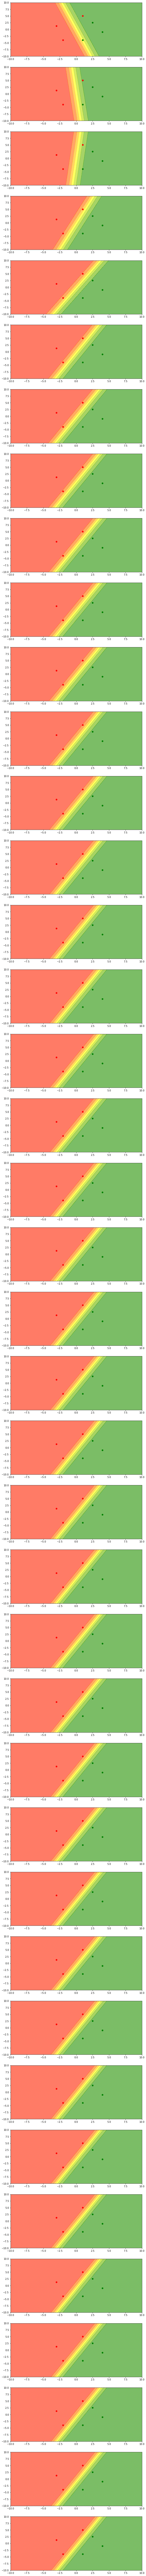

In [283]:
sn.fit(X, Y, 1, 0.05, True)
N = 40
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

# Loading Mobile Data

In [284]:
data = pd.read_csv("mobile_cleaned.csv.csv")

In [285]:
data.head(10)

PhoneId  Pixel Density  Screen Size  Weight  RAM  Processor_frequency  \
0        0            403         6.26     182    4                  1.8   
1        1            271         6.20     168    3                  1.8   
2        2            409         6.30     168    3                  2.1   
3        4            411         6.00     169    4                  2.2   
4        5            396         6.50     175    4                  2.2   
5        7            402         6.41     156    6                  2.2   
6        8            295         5.45     145    2                  2.0   
7        9            432         5.84     178    3                  2.0   
8       10            271         6.20     168    2                  1.8   
9       12            403         6.18     182    6                  2.8   

   Screen to Body Ratio (calculated)  Height  Internal Memory  Capacity  ...  \
0                              80.68   157.9               64      4000  ...   
1                              80.85   156.2               32      4230  ...   
2                              83.68   157.0               32      3500  ...   
3                              74.78   159.8               64      3300  ...   
4                              84.23   160.4               64      3750  ...   
5                              84.98   157.9               64      3400  ...   
6                              72.68   147.5               16      3000  ...   
7                              79.24   149.3               32      4000  ...   
8                              80.85   156.2               16      4230  ...   
9                              82.20   155.5               64      4000  ...   

   os_name_Tizen  os_name_iOS  SIM Slot(s)_Dual SIM, GSM+CDMA  \
0              0            0                               0   
1              0            0                               0   
2              0            0                               0   
3              0            0                               0   
4              0            0                               0   
5              0            0                               0   
6              0            0                               0   
7              0            0                               0   
8              0            0                               0   
9              0            0                               0   

   SIM Slot(s)_Dual SIM, GSM+GSM  SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE  \
0                              0                                          1   
1                              0                                          1   
2                              0                                          1   
3                              1                                          0   
4                              0                                          1   
5                              0                                          1   
6                              0                                          1   
7                              1                                          0   
8                              1                                          0   
9                              0                                          1   

   SIM Slot(s)_Single SIM, GSM  Sim1_2G  Sim1_3G  Sim1_4G  Rating  
0                            0        0        0        1     4.5  
1                            0        0        0        1     4.5  
2                            0        0        0        1     4.4  
3                            0        0        0        1     4.3  
4                            0        0        0        1     4.4  
5                            0        0        0        1     4.5  
6                            0        0        0        1     4.3  
7                            0        0        0        1     4.1  
8                            0        0        0        1     4.3  
9                  

## We can see that we have all features as numerical features.All sort of one hot encoding and binarisation has already been performed on the dataset provided.

## The problem is a binary classification problem

In [286]:
data.shape

(341, 88)

In [287]:
# input data
X = data.drop('Rating', axis=1)

In [288]:
# output data
Y = data['Rating'].values

In [289]:
#Y

In [290]:
# setting a threshold because ratings are real valued numbers
threshold = 4.1
data['Class'] = (data['Rating'] >= threshold).astype(np.int) # will give values as 0 and 1 based on threshold

In [291]:
data['Class']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     0
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
311    1
312    0
313    1
314    1
315    1
316    0
317    0
318    0
319    0
320    0
321    1
322    1
323    1
324    0
325    0
326    1
327    1
328    0
329    0
330    0
331    1
332    0
333    0
334    0
335    1
336    0
337    0
338    1
339    0
340    1
Name: Class, Length: 341, dtype: int32

In [292]:
data['Class'].value_counts()

1    200
0    141
Name: Class, dtype: int64

In [293]:
# seeing in terms of percentage 

data['Class'].value_counts(normalize = True)*100

1    58.651026
0    41.348974
Name: Class, dtype: float64

### We can see that we have more number of datapoints which have threshold less than 4.1 as compared to data points which have threshold greater than 4.1 hence we can say that there is some imbalance in data so let us try o change the threshold value.

### We want to decrease the data points with Class = 1 hence that can be done by increasing the threshold value.

In [294]:
# setting a threshold because ratings are real valued numbers
threshold = 4.3
data['Class'] = (data['Rating'] >= threshold).astype(np.int) # will give values as 0 and 1 based on threshold

In [295]:
data['Class'].value_counts()

0    215
1    126
Name: Class, dtype: int64

In [296]:
# seeing in terms of percentage 

data['Class'].value_counts(normalize = True)*100

0    63.049853
1    36.950147
Name: Class, dtype: float64

## Still having the similar issue lets try different threshold value.

In [297]:
# setting a threshold because ratings are real valued numbers
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int) # will give values as 0 and 1 based on threshold

In [298]:
data['Class'].value_counts()

0    182
1    159
Name: Class, dtype: int64

In [299]:
# seeing in terms of percentage 

data['Class'].value_counts(normalize = True)*100

0    53.372434
1    46.627566
Name: Class, dtype: float64

## Now it is somewhat closer hence it can work well.

In [300]:
Y_binarised = data['Class'].values

In [301]:
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

## Preprocessing of the dataset.

## Standardisation

### Our dataframe has features giving values with different range some feature values are very high while some are very less.

### After standardisation we have mean of the feature = 0 and standard deviation of feature  = 1.

In [302]:
random_numbers = np.random.random([200, 1])

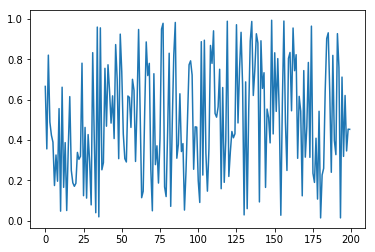

In [303]:
plt.plot(random_numbers)
plt.show()

In [304]:
np.mean(random_numbers)

0.5022872002428361

In [305]:
np.std(random_numbers)

0.2780704549836501

In [306]:
# applying sklearn standardisation.
scaler = StandardScaler()  # importing the object of StandardScaler()

In [307]:
scaler.fit(random_numbers)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [308]:
scaler.mean_    # not yet transformed.

array([0.5022872])

In [309]:
random_numbers_standardised = scaler.transform(random_numbers)

In [310]:
np.mean(random_numbers_standardised)   # below output is almost close to 0 

-1.7763568394002506e-16

In [311]:
np.std(random_numbers_standardised)  # below output is almost close to 1

1.0

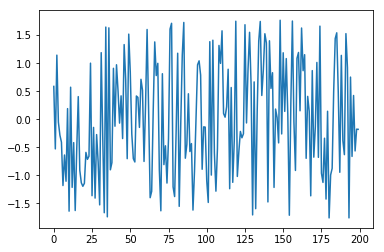

In [312]:
plt.plot(random_numbers_standardised)
plt.show()

## We should split first and then standardise because otherwise the mean and variance we calculate beforehand also includes the contribution of the test data points which is the reason for data leakage.

In [313]:
# train - test split.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarised)

# stratify will divide the data based on the categorical variable Y_binaried it ensures that number of 1's and 0's is roughly the same in both test and train.

In [314]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


## We have access to only the X_train data during training the model.

## Standardisation of data.

In [315]:
scaler = StandardScaler()

In [316]:
X_scaled_train = scaler.fit_transform(X_train) # it will both fit and transform in one go.
X_scaled_test = scaler.transform(X_test)  # no fitting on the test data always remember that.

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


## Now we want to standardise Y variable in such a form so that it gives output in the range of 0 to 1 because that's what a sigmoid function does and we also want the same.It should match the characterstic of a sigmoid neuron.

In [317]:
# it ensures that the scaled values are between 0 and 1.. minimum one will have 0 and maximum one will have 1
minmax_scaler = MinMaxScaler()

In [318]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

In [319]:
np.min(Y_scaled_train)

0.0

In [320]:
np.max(Y_scaled_train)

1.0

In [321]:
# applying the above fitted transformation to test data
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

## We need to scale our threshold also we had 4.2 previously but not we want to scale it first.

In [322]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]  

# this is just a way of applying min max scaler on a single number.

In [323]:
scaled_threshold   # it represents 4.2 in the transformed format.

0.6800000000000002

In [324]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()  # ravel means flattening the array.

In [325]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

In [326]:
Y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [327]:
Y_binarised_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

# Applying on the sigmoid neuron which we created before.

# Training  on Real World Data -- Mobile Data.

In [328]:
sn = SigmoidNeuron()

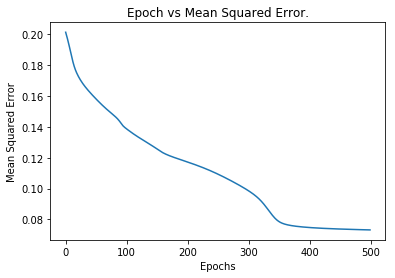

In [329]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=500, learning_rate=0.005, display_loss=True)

### We see that mean squared loss is getting minimised as the number of epochs are increasing.

In [330]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [331]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [332]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [333]:
print(accuracy_train, accuracy_test)

0.7490196078431373 0.7790697674418605


### Changing the epoch and learning rate now 

In [334]:
sn = SigmoidNeuron()

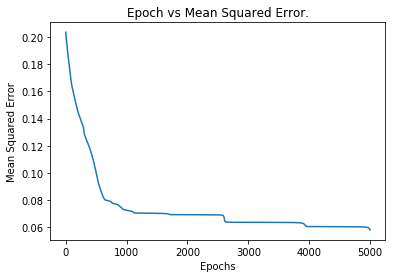

In [335]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=5000, learning_rate=0.005, display_loss=True)

In [336]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [337]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [338]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [339]:
print(accuracy_train, accuracy_test)

0.803921568627451 0.7441860465116279


## From the above plots shown I will consider epoch = 4000 for the least mean squared error.

In [340]:
sn = SigmoidNeuron()

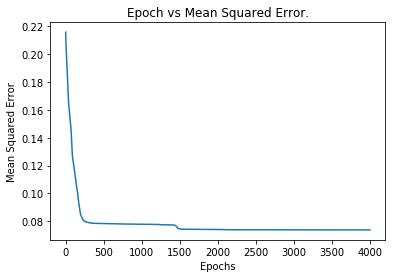

In [341]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=4000, learning_rate=0.015, display_loss=True)

In [342]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [343]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [344]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [345]:
print(accuracy_train, accuracy_test)

0.7137254901960784 0.8255813953488372
